In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Cel biznesowy

'We are going to explore the usefulness of unsupervised clustering algorithms to help doctors understand which treatments might work with their patients. We are going to cluster anonymized data of patients who have been diagnosed with heart disease. Patients with similar characteristics might respond to the same treatments, and doctors could benefit from learning about the treatment outcomes of patients like those they are treating.' - tekst z Kaggle

Zatem nasz zbiór danych zawiera dane osób które mają problemy z sercem i naszym celem będzie pogrupowanie ich w jakiś sposób.

link: https://www.kaggle.com/datasets/kingabzpro/heart-disease-patients

Zatem cel: **Znalezienie pacjentów o podobnych charakterystykach i pogrupowanie ich**

# Split

In [22]:
df = pd.read_csv("heart_disease_patients.csv")
df = df.drop(columns='id')
df = df.drop(columns='cp')

In [23]:
train, val = train_test_split(df)

In [24]:
train.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
103,71,0,110,265,1,2,130,0,0.0,1
88,53,0,138,234,0,2,160,0,0.0,1
273,71,0,112,149,0,0,125,0,1.6,2
189,69,1,140,254,0,2,146,0,2.0,2
8,63,1,130,254,0,2,147,0,1.4,2


# EDA

In [8]:
train.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
219,59,1,138,271,0,2,182,0,0.0,1
243,61,1,134,234,0,0,145,0,2.6,2
85,44,1,140,235,0,2,180,0,0.0,1
40,65,0,150,225,0,2,114,0,1.0,2
207,50,1,144,200,0,2,126,1,0.9,2


In [9]:
train.shape

(227, 10)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 219 to 158
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       227 non-null    int64  
 1   sex       227 non-null    int64  
 2   trestbps  227 non-null    int64  
 3   chol      227 non-null    int64  
 4   fbs       227 non-null    int64  
 5   restecg   227 non-null    int64  
 6   thalach   227 non-null    int64  
 7   exang     227 non-null    int64  
 8   oldpeak   227 non-null    float64
 9   slope     227 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 19.5 KB


In [11]:
train.tail()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
260,44,0,118,242,0,0,149,0,0.3,2
223,53,1,123,282,0,0,95,1,2.0,2
149,60,0,102,318,0,0,160,0,0.0,1
265,42,1,136,315,0,0,125,1,1.8,2
158,60,1,140,293,0,2,170,0,1.2,2


In [12]:
train.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope'],
      dtype='object')

**Wyjaśnienie znaczenia niektórych kolumn:**\
**cp** - chest pain type\
**trestbps** - resting blood pressure\
**chol** - serum colesterol\
**fbs** - fasting blood sugar\
**restecg** - resting electrocardiographic results\
**thalach** - maximum heart rate achieved\
**exang** - exercise induced angina (1=yes, 0=no) \
**oldpeak** -st depression induced by exercise relative to rest \
**slope** - the slope of the peak exercise ST segment

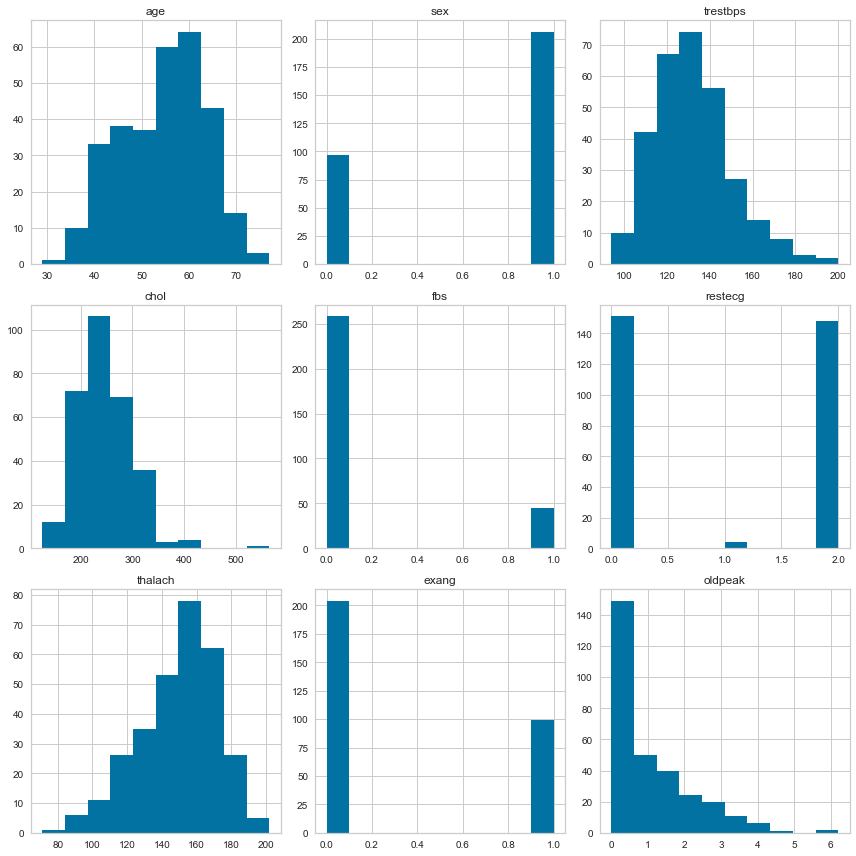

In [13]:
fig, axs = plt.subplots(3, 3,figsize = (12,12))
i=0
col = df.columns
for row in range(3):
    for column in range(3):
        axs[row,column].set_title(col[i])
        axs[row,column].hist(df[col[i]])
        i+=1
plt.tight_layout()
plt.show()

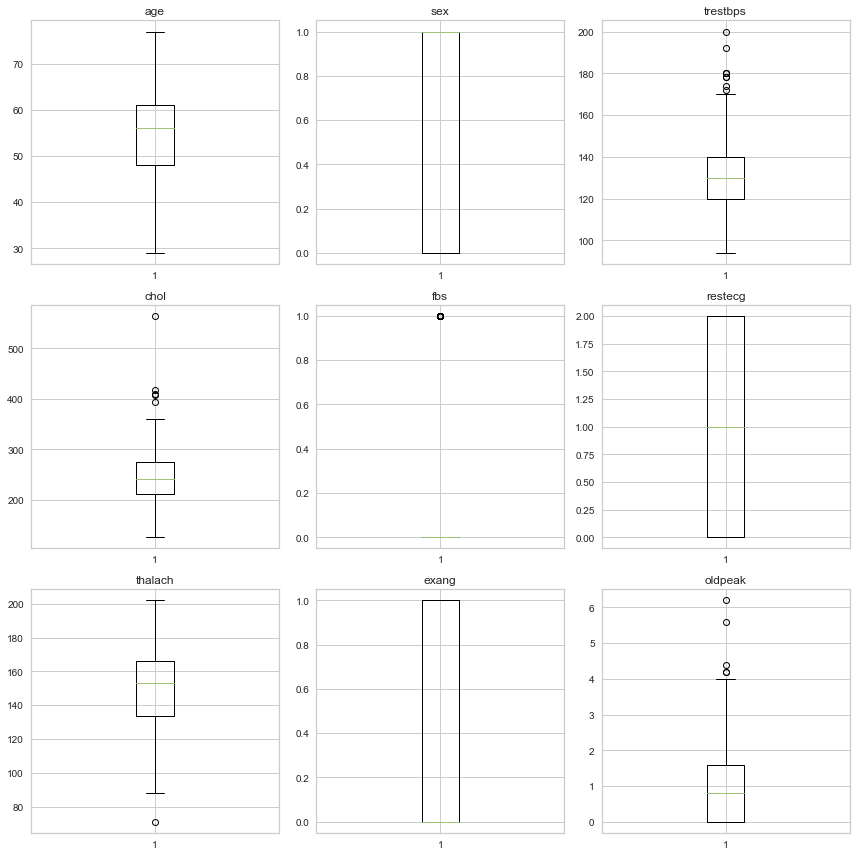

In [14]:
fig, axs = plt.subplots(3, 3,figsize = (12,12))
i=0
col = df.columns
for row in range(3):
    for column in range(3):
        axs[row,column].set_title(col[i])
        axs[row,column].boxplot(df[col[i]])
        i+=1
plt.tight_layout()
plt.show()

In [15]:
df.describe()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000


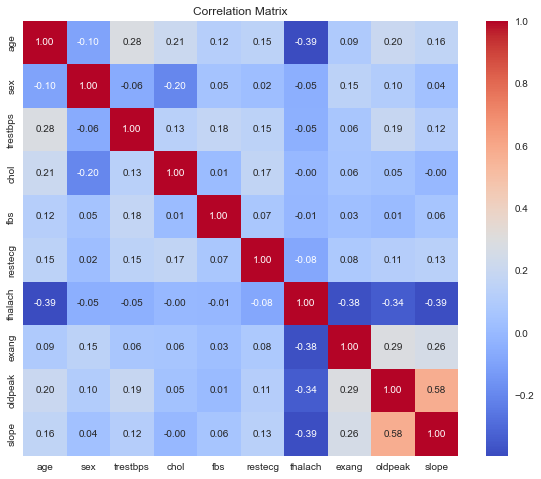

In [16]:
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()

# Data preprocessing

In [17]:
pipeline1 = Pipeline([
    ('scaler', StandardScaler())
])

In [18]:
train_transformed = pipeline1.fit_transform(train)

In [19]:
train_transformed

array([[ 0.53730028,  0.68849544,  0.39371236, ..., -0.70944433,
        -0.8920921 , -1.01952638],
       [ 0.75052959,  0.68849544,  0.16542959, ..., -0.70944433,
         1.27017796,  0.64545555],
       [-1.06191953,  0.68849544,  0.50785374, ..., -0.70944433,
        -0.8920921 , -1.01952638],
       ...,
       [ 0.64391494, -1.45244244, -1.66083259, ..., -0.70944433,
        -0.8920921 , -1.01952638],
       [-1.27514884,  0.68849544,  0.27957097, ...,  1.40955387,
         0.60486409,  0.64545555],
       [ 0.64391494,  0.68849544,  0.50785374, ..., -0.70944433,
         0.10587869,  0.64545555]])

# Dimensional reduction

W tej sekcji rzutowaliśmy nasze dane na płaszczyznę stosując różne sposoby.

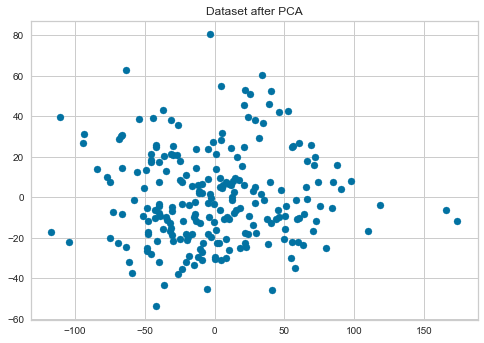

In [131]:
pca = PCA(n_components=2)
train_pca = pca.fit_transform(train)
plt.scatter(train_pca[:,0],train_pca[:,1])
plt.title('Dataset after PCA')
plt.show()

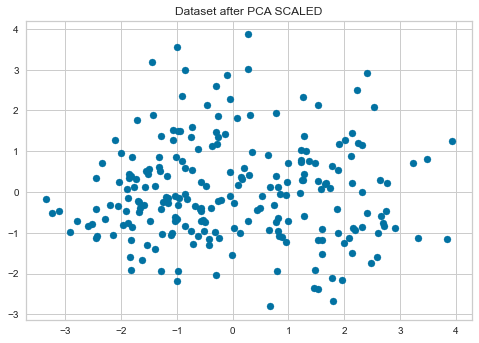

In [132]:
pca = PCA(n_components=2)
train_pca_transformed = pca.fit_transform(train_transformed)
plt.scatter(train_pca_transformed[:,0],train_pca_transformed[:,1])
plt.title('Dataset after PCA SCALED')
plt.show()

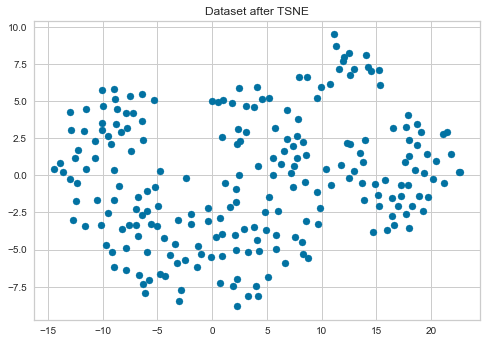

In [133]:
tsne = TSNE(n_components=2)
train_tsne = tsne.fit_transform(train)
plt.scatter(train_tsne[:,0],train_tsne[:,1])
plt.title('Dataset after TSNE')
plt.show()

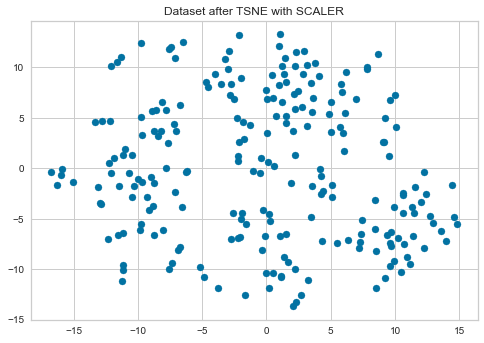

In [134]:
tsne = TSNE(n_components=2)
train_tsne_transformed = tsne.fit_transform(train_transformed)
plt.scatter(train_tsne_transformed[:,0],train_tsne_transformed[:,1])
plt.title('Dataset after TSNE with SCALER')
plt.show()

# Hierarchical clustering

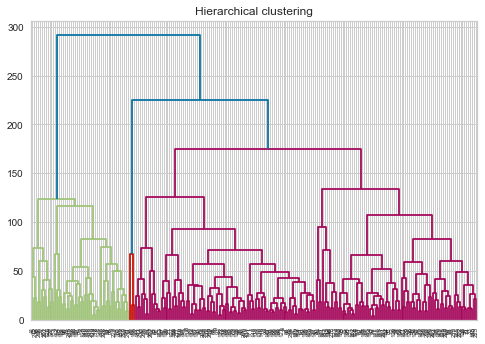

In [135]:
mergings = linkage(train, method = 'complete')

dendrogram(mergings,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.title('Hierarchical clustering')
plt.show()


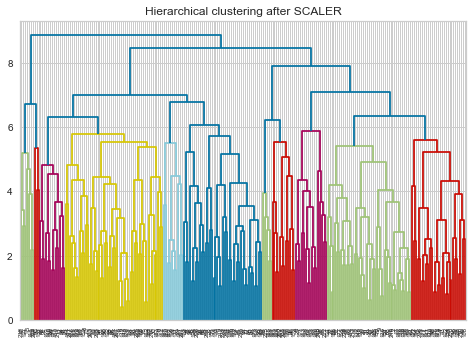

In [136]:
mergings = linkage(train_transformed, method = 'complete') #mozemy zmienic method 

dendrogram(mergings,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.title('Hierarchical clustering after SCALER')
plt.show()


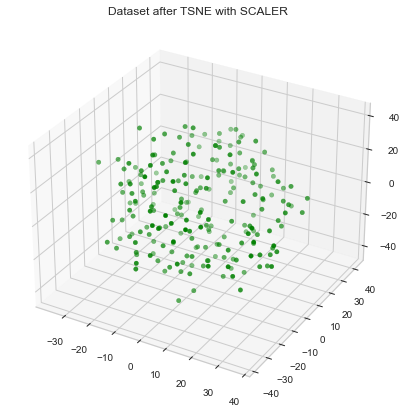

In [137]:
tsne = TSNE(n_components=3)
train_tsne_transformed = tsne.fit_transform(train_transformed)

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
ax.scatter3D(train_tsne_transformed[:,0], train_tsne_transformed[:,1], train_tsne_transformed[:,2], color = "green")
 
plt.title('Dataset after TSNE with SCALER')
plt.show()


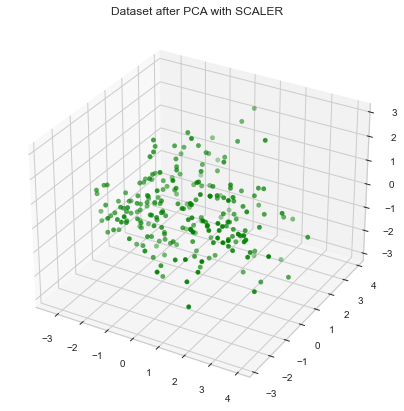

In [138]:
pca = PCA(n_components=3)
train_pca_transformed = pca.fit_transform(train_transformed)

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
ax.scatter3D(train_pca_transformed[:,0], train_pca_transformed[:,1], train_pca_transformed[:,2], color = "green")
 
plt.title('Dataset after PCA with SCALER')
plt.show()


# Dimension reduction - finding number of features in PCA

In [139]:
train.shape #mamy 11 kolumn

(227, 11)

In [140]:
var = []
for i in range(1,11):
    pca = PCA(n_components=i)
    pca.fit_transform(train)
    var.append(max(np.cumsum(pca.explained_variance_ratio_)))

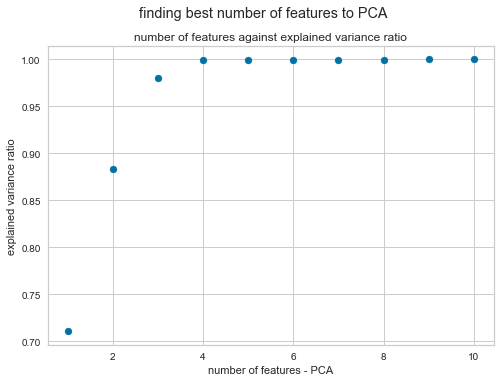

In [141]:
plt.scatter(range(1,11),var)
plt.xlabel('number of features - PCA')
plt.ylabel('explained variance ratio')
plt.title('number of features against explained variance ratio')
plt.suptitle('finding best number of features to PCA')
plt.show()

# Cel - pogrupowanie w klastry i opisać charakterystyki tych klastrów.
# Final model

Elbow Method to determine the number of clusters to be formed:


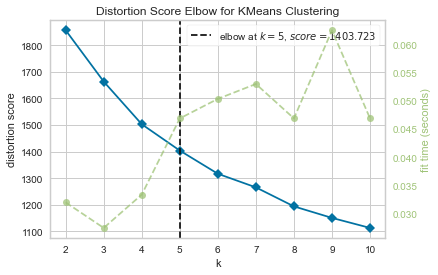

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans())
Elbow_M.fit(train_transformed)
Elbow_M.show()

In [26]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(train_transformed)

KMeans(n_clusters=5)

In [27]:
kmeans.predict(train_transformed)

array([1, 0, 1, 0, 2, 3, 3, 1, 3, 3, 3, 1, 3, 0, 4, 0, 4, 0, 3, 1, 1, 3,
       1, 1, 4, 1, 4, 0, 1, 2, 4, 2, 4, 4, 1, 1, 2, 1, 1, 0, 0, 3, 1, 2,
       2, 1, 1, 0, 1, 0, 2, 0, 3, 3, 4, 2, 2, 1, 0, 3, 3, 3, 4, 1, 0, 3,
       4, 0, 2, 0, 1, 1, 3, 4, 3, 1, 1, 2, 4, 3, 3, 3, 3, 4, 2, 2, 2, 3,
       3, 1, 3, 2, 1, 1, 0, 1, 1, 1, 3, 0, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 0, 4, 3, 1, 3, 1, 4, 4, 2, 3, 2, 2, 0, 1, 1, 1, 3, 0,
       3, 2, 1, 1, 0, 4, 2, 2, 1, 1, 3, 3, 2, 2, 1, 1, 4, 3, 0, 1, 1, 0,
       2, 1, 1, 3, 2, 1, 3, 4, 3, 1, 4, 0, 3, 2, 1, 2, 0, 1, 2, 1, 4, 4,
       1, 3, 4, 4, 3, 0, 3, 4, 4, 0, 1, 3, 2, 3, 3, 0, 4, 1, 2, 2, 3, 3,
       1, 1, 3, 1, 2, 0, 4, 4, 1, 2, 2, 0, 0, 2, 0, 3, 1, 4, 1, 1, 0, 1,
       1, 1, 3, 2, 3, 2, 0])

In [28]:
#train["clusters"] = kmeans.predict(train_pca_transformed)

NameError: name 'train_pca_transformed' is not defined

# Analiza charakterystyk klastr/ Model evaluation

## Centroidy klastr

In [29]:
# Assign cluster labels to the original data
labels = kmeans.labels_
train['cluster'] = labels

# Analyze centroid values
scaled_centroids = kmeans.cluster_centers_
unscaled_centroids = pipeline1.inverse_transform(scaled_centroids)

k=0
for i, centroid in enumerate(unscaled_centroids):
    print(f"Cluster {i+1} centroid values:")
    for j, value in enumerate(centroid):
        print(f"{df.columns[k]}: {value}")
        k+=1
    print()
    k=0

Cluster 1 centroid values:
age: 61.17647058823529
sex: 0.8529411764705882
trestbps: 139.2058823529412
chol: 238.23529411764704
fbs: 5.551115123125783e-17
restecg: 1.5000000000000002
thalach: 138.26470588235296
exang: 1.1102230246251565e-16
oldpeak: 1.8323529411764707
slope: 1.9705882352941175

Cluster 2 centroid values:
age: 46.15277777777778
sex: 0.8611111111111112
trestbps: 123.76388888888889
chol: 226.79166666666666
fbs: 0.013888888888888992
restecg: 0.527777777777778
thalach: 166.69444444444443
exang: 0.11111111111111116
oldpeak: 0.3736111111111111
slope: 1.2499999999999996

Cluster 3 centroid values:
age: 55.904761904761905
sex: 0.9761904761904764
trestbps: 130.16666666666666
chol: 248.71428571428572
fbs: 8.326672684688674e-17
restecg: 1.0714285714285714
thalach: 125.83333333333334
exang: 1.0000000000000004
oldpeak: 2.1095238095238096
slope: 2.0238095238095233

Cluster 4 centroid values:
age: 56.816326530612244
sex: 0.02040816326530681
trestbps: 131.46938775510205
chol: 284.959183

In [30]:
df_transformed = pd.DataFrame(train_transformed, columns=df.columns)

In [31]:
df_transformed['cluster']= labels

## Średnie klastr

In [32]:
mean_values_scaled = df_transformed.groupby('cluster').mean()

# Reverse scaling to obtain mean values in the original unscaled form
mean_values_unscaled = pipeline1.inverse_transform(mean_values_scaled)

# Create a DataFrame with mean values of the original unscaled features
mean_values_df = pd.DataFrame(mean_values_unscaled, columns=mean_values_scaled.columns)

# Print the mean values for each cluster and feature
for cluster in range(kmeans.n_clusters):
    print(f"Cluster {cluster+1} mean values:")
    print(round(mean_values_df.loc[cluster],2))
    print()

Cluster 1 mean values:
age          61.18
sex           0.85
trestbps    139.21
chol        238.24
fbs           0.00
restecg       1.50
thalach     138.26
exang         0.00
oldpeak       1.83
slope         1.97
Name: 0, dtype: float64

Cluster 2 mean values:
age          46.15
sex           0.86
trestbps    123.76
chol        226.79
fbs           0.01
restecg       0.53
thalach     166.69
exang         0.11
oldpeak       0.37
slope         1.25
Name: 1, dtype: float64

Cluster 3 mean values:
age          55.90
sex           0.98
trestbps    130.17
chol        248.71
fbs           0.00
restecg       1.07
thalach     125.83
exang         1.00
oldpeak       2.11
slope         2.02
Name: 2, dtype: float64

Cluster 4 mean values:
age          56.82
sex           0.02
trestbps    131.47
chol        284.96
fbs           0.00
restecg       1.02
thalach     152.08
exang         0.27
oldpeak       0.62
slope         1.51
Name: 3, dtype: float64

Cluster 5 mean values:
age          57.13
sex   

## Mediany klastr

In [33]:
mean_values_scaled = df_transformed.groupby('cluster').median()

# Reverse scaling to obtain mean values in the original unscaled form
mean_values_unscaled = pipeline1.inverse_transform(mean_values_scaled)

# Create a DataFrame with mean values of the original unscaled features
mean_values_df = pd.DataFrame(mean_values_unscaled, columns=mean_values_scaled.columns)

# Print the mean values for each cluster and feature
for cluster in range(kmeans.n_clusters):
    print(f"Cluster {cluster+1} median values:")
    print(round(mean_values_df.loc[cluster],2))
    print()

Cluster 1 median values:
age          60.5
sex           1.0
trestbps    140.0
chol        231.5
fbs           0.0
restecg       2.0
thalach     145.0
exang         0.0
oldpeak       1.8
slope         2.0
Name: 0, dtype: float64

Cluster 2 median values:
age          44.5
sex           1.0
trestbps    122.0
chol        222.5
fbs           0.0
restecg       0.0
thalach     169.0
exang         0.0
oldpeak       0.0
slope         1.0
Name: 1, dtype: float64

Cluster 3 median values:
age          57.0
sex           1.0
trestbps    128.0
chol        246.0
fbs           0.0
restecg       2.0
thalach     126.0
exang         1.0
oldpeak       2.0
slope         2.0
Name: 2, dtype: float64

Cluster 4 median values:
age          58.0
sex           0.0
trestbps    130.0
chol        269.0
fbs           0.0
restecg       2.0
thalach     157.0
exang         0.0
oldpeak       0.3
slope         2.0
Name: 3, dtype: float64

Cluster 5 median values:
age          56.5
sex           1.0
trestbps    132.0
c

In [36]:
train

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,cluster
103,71,0,110,265,1,2,130,0,0.0,1,1
88,53,0,138,234,0,2,160,0,0.0,1,0
273,71,0,112,149,0,0,125,0,1.6,2,1
189,69,1,140,254,0,2,146,0,2.0,2,0
8,63,1,130,254,0,2,147,0,1.4,2,2
...,...,...,...,...,...,...,...,...,...,...,...
166,52,1,138,223,0,0,169,0,0.0,1,3
43,59,1,150,212,1,0,157,0,1.6,1,2
161,77,1,125,304,0,2,162,1,0.0,1,3
59,51,1,125,213,0,2,125,1,1.4,1,2


### Kilka wizualizacji podziału klastr

In [34]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60","#F3AB92"]

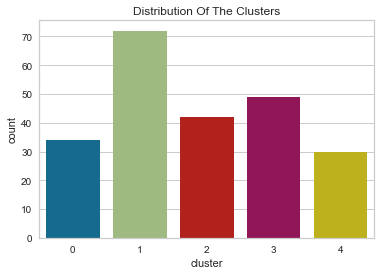

In [37]:
pl = sns.countplot(train["cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

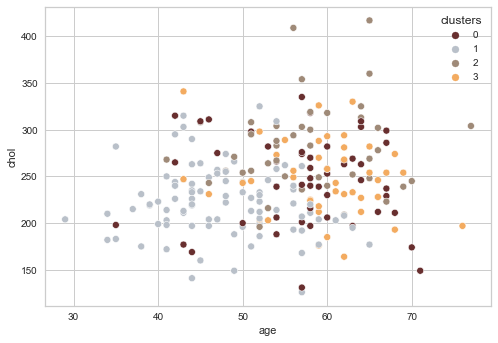

In [175]:
sns.scatterplot(train["age"],train["chol"],hue=train["clusters"], palette=pal)
plt.show()

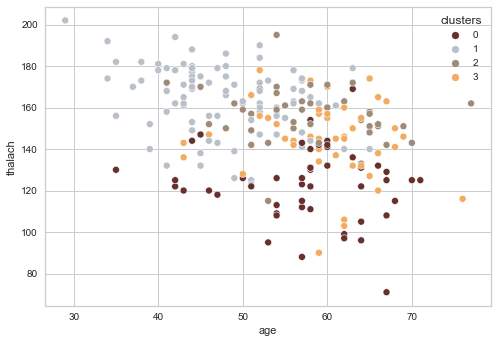

In [176]:
sns.scatterplot(train["age"],train["thalach"],hue=train["clusters"], palette=pal)
plt.show()

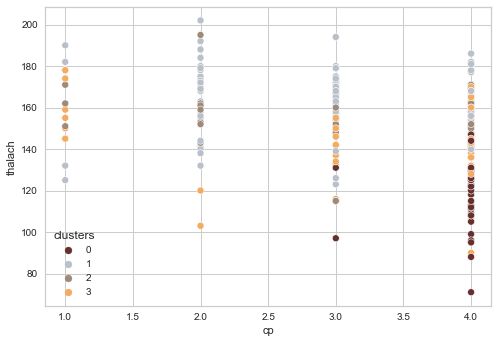

In [179]:
sns.scatterplot(train["cp"],train["thalach"],hue=train["clusters"], palette=pal)
plt.show()

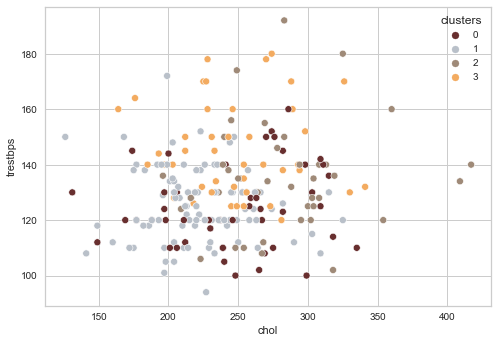

In [180]:
sns.scatterplot(train["chol"],train["trestbps"],hue=train["clusters"], palette=pal)
plt.show()

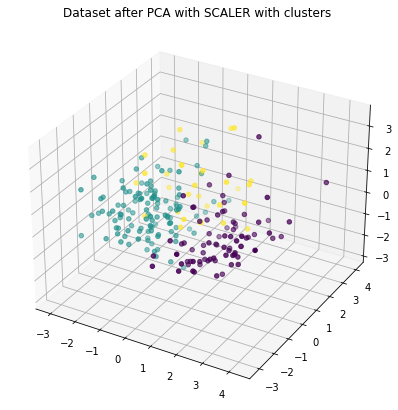

In [51]:
pca = PCA(n_components=3)
train_pca_transformed = pca.fit_transform(train_transformed)

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
ax.scatter3D(train_pca_transformed[:,0], train_pca_transformed[:,1], train_pca_transformed[:,2],c = train['cluster'])
 
plt.title('Dataset after PCA with SCALER with clusters')
plt.show()


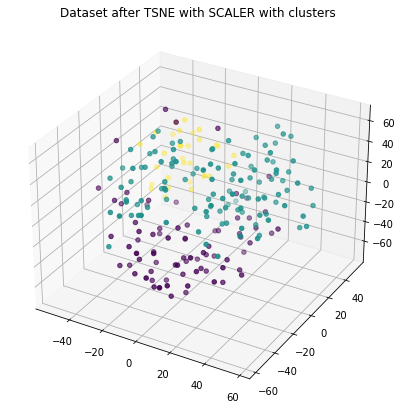

In [52]:
tsne = TSNE(n_components=3)
train_tsne_transformed = tsne.fit_transform(train_transformed)

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
ax.scatter3D(train_tsne_transformed[:,0], train_tsne_transformed[:,1], train_tsne_transformed[:,2],c = train['cluster'])
 
plt.title('Dataset after TSNE with SCALER with clusters')
plt.show()


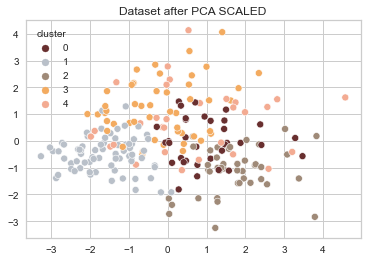

In [40]:
pca = PCA(n_components=2)
train_pca_transformed = pca.fit_transform(train_transformed)
sns.scatterplot(train_pca_transformed[:,0],train_pca_transformed[:,1], hue = train['cluster'], palette=pal)
plt.title('Dataset after PCA SCALED')
plt.fi
plt.show()

# Próby różnych innych modeli, nie brane później pod uwagę

## Without scaling values

### Sprawdzanie ilości klastrów przy pomocy metody łokcia

In [12]:
def count_wcss_scores(X, k_max):
    #  WCSS = within-cluster sum of squares
    scores = []
    for k in range(1, k_max+1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        wcss = kmeans.score(X) * -1 # score returns -WCSS
        scores.append(wcss)
    return scores

C:\Users\Krzysztof\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


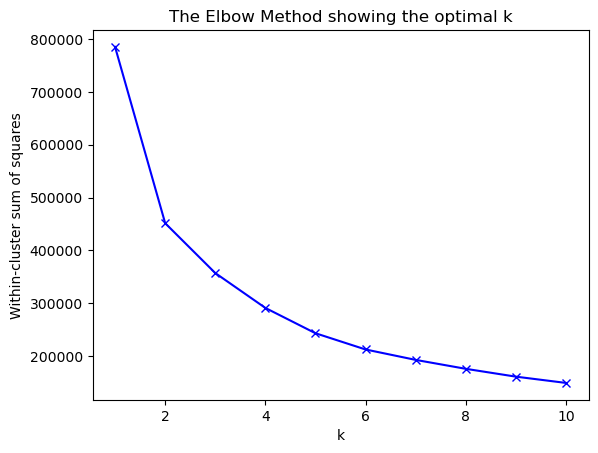

In [13]:
wcss_vec = count_wcss_scores(train, 10)
x_ticks = list(range(1, len(wcss_vec) + 1))
plt.plot(x_ticks, wcss_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Within-cluster sum of squares')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Metoda silhouette

In [14]:
def count_clustering_scores(X, cluster_num, model, score_fun):
    # Napiszmy tę funkcje tak ogólnie, jak to możliwe. 
    # Zwróćcie uwagę na przekazanie obiektów typu callable: model i score_fun.
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

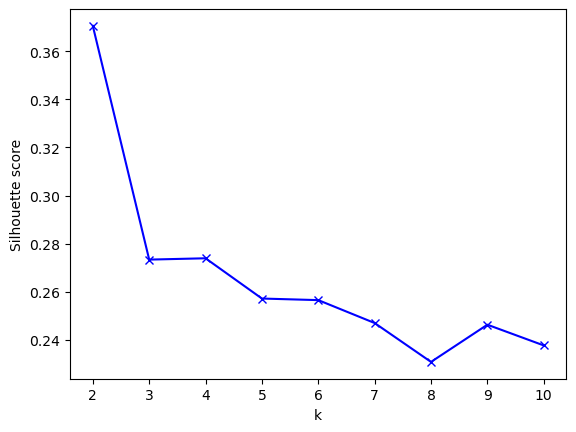

In [15]:
from sklearn.metrics import silhouette_score

cluster_num_seq = range(2, 11) # Niektóre metryki nie działają gdy mamy tylko jeden klaster
silhouette_vec = count_clustering_scores(train, cluster_num_seq, KMeans, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

In [19]:
clustering_kmeans = KMeans(n_clusters=2)
train['clusters'] = clustering_kmeans.fit_predict(train)

In [20]:
train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,clusters
37,57,1,4,150,276,0,2,112,1,0.6,2,1
18,48,0,3,130,275,0,0,139,0,0.2,1,1
164,48,1,3,124,255,1,0,175,0,0.0,1,0
240,41,1,2,110,235,0,0,153,0,0.0,1,0
116,58,1,3,140,211,1,2,165,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
159,68,1,3,118,277,0,0,151,0,1.0,1,1
252,64,1,4,128,263,0,0,105,1,0.2,2,1
132,29,1,2,130,204,0,2,202,0,0.0,1,0
277,39,0,3,138,220,0,0,152,0,0.0,2,0


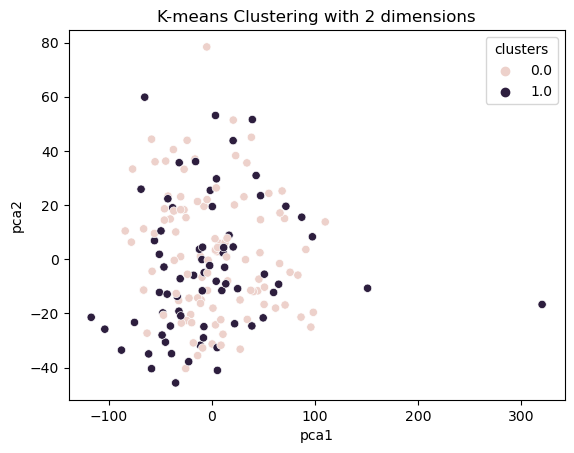

In [22]:
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(train)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=train['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [25]:
# Assign cluster labels to the original data
labels = clustering_kmeans.labels_
train['clusters'] = labels

# Analyze centroid values
scaled_centroids = clustering_kmeans.cluster_centers_

k=0
for i, centroid in enumerate(scaled_centroids):
    print(f"Cluster {i+1} centroid values:")
    for j, value in enumerate(centroid):
        print(f"{df.columns[k]}: {value}")
        k+=1
    print()
    k=0

Cluster 1 centroid values:
age: 53.16901408450704
sex: 0.7183098591549296
cp: 3.098591549295775
trestbps: 131.03521126760563
chol: 213.7746478873239
fbs: 0.15492957746478875
restecg: 0.8732394366197185
thalach: 150.70422535211267
exang: 0.2746478873239437
oldpeak: 1.0443661971830986
slope: 1.6056338028169013

Cluster 2 centroid values:
age: 56.05882352941177
sex: 0.6117647058823528
cp: 3.2
trestbps: 134.74117647058824
chol: 292.59999999999997
fbs: 0.16470588235294126
restecg: 1.1411764705882352
thalach: 144.1764705882353
exang: 0.3764705882352941
oldpeak: 1.1400000000000001
slope: 1.588235294117647



## With scaling values

C:\Users\Krzysztof\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


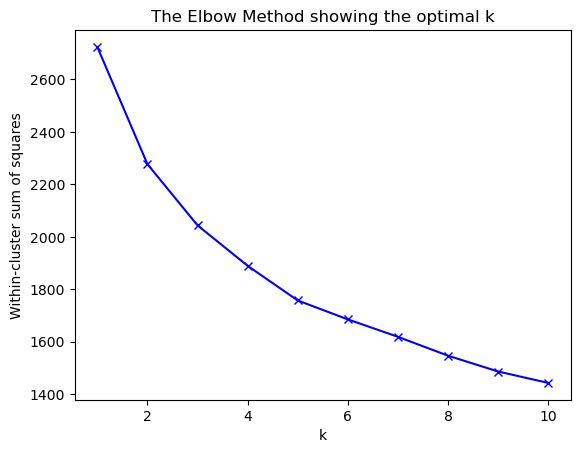

In [29]:
wcss_vec = count_wcss_scores(train_transformed, 10)
x_ticks = list(range(1, len(wcss_vec) + 1))
plt.plot(x_ticks, wcss_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Within-cluster sum of squares')
plt.title('The Elbow Method showing the optimal k')
plt.show()

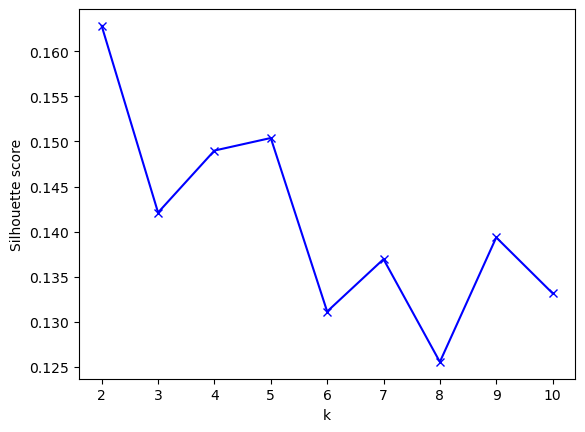

In [30]:
from sklearn.metrics import silhouette_score

cluster_num_seq = range(2, 11) # Niektóre metryki nie działają gdy mamy tylko jeden klaster
silhouette_vec = count_clustering_scores(train_transformed, cluster_num_seq, KMeans, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

In [57]:
train_transformed=pd.DataFrame(train_transformed)
train_transformed

,0,1,2,3,4,5,6,7,8,9,10
0,-1.411450,0.674632,0.874199,0.195646,1.293941,-0.405096,-1.000020,-1.030682,1.395726,0.612902,0.624963
1,-1.523517,0.674632,-0.164771,-0.136197,-0.610545,-0.405096,1.008869,0.843128,-0.716473,0.782778,0.624963
2,0.941954,0.674632,-2.242710,0.693409,-0.252276,2.468552,1.008869,0.058743,-0.716473,1.037593,2.274575
3,-1.747651,-1.482290,-0.164771,0.306260,-0.497408,-0.405096,-1.000020,0.145897,-0.716473,-0.915986,0.624963
4,-1.523517,-1.482290,-1.203740,-0.136197,-0.799108,-0.405096,1.008869,1.017436,-0.716473,0.273149,-1.024649
...,...,...,...,...,...,...,...,...,...,...,...
222,-1.747651,-1.482290,-0.164771,-2.127250,-0.893390,-0.405096,-1.000020,1.322475,-0.716473,-0.915986,-1.024649
223,-0.626982,-1.482290,0.874199,-0.136197,0.426551,-0.405096,-1.000020,0.625243,-0.716473,-0.915986,-1.024649
224,1.166088,-1.482290,0.874199,0.969944,-0.403126,-0.405096,1.008869,-1.510029,-0.716473,-0.066604,0.624963
225,0.157486,0.674632,0.874199,-0.025583,-1.176234,-0.405096,1.008869,-1.902222,1.395726,0.867717,0.624963


In [58]:
kmeans = KMeans(n_clusters=2)
train_transformed['clusters'] = kmeans.fit_predict(train_transformed)
train_transformed

,0,1,2,3,4,5,6,7,8,9,10,clusters
0,-1.411450,0.674632,0.874199,0.195646,1.293941,-0.405096,-1.000020,-1.030682,1.395726,0.612902,0.624963,0
1,-1.523517,0.674632,-0.164771,-0.136197,-0.610545,-0.405096,1.008869,0.843128,-0.716473,0.782778,0.624963,1
2,0.941954,0.674632,-2.242710,0.693409,-0.252276,2.468552,1.008869,0.058743,-0.716473,1.037593,2.274575,0
3,-1.747651,-1.482290,-0.164771,0.306260,-0.497408,-0.405096,-1.000020,0.145897,-0.716473,-0.915986,0.624963,1
4,-1.523517,-1.482290,-1.203740,-0.136197,-0.799108,-0.405096,1.008869,1.017436,-0.716473,0.273149,-1.024649,1
...,...,...,...,...,...,...,...,...,...,...,...,...
222,-1.747651,-1.482290,-0.164771,-2.127250,-0.893390,-0.405096,-1.000020,1.322475,-0.716473,-0.915986,-1.024649,1
223,-0.626982,-1.482290,0.874199,-0.136197,0.426551,-0.405096,-1.000020,0.625243,-0.716473,-0.915986,-1.024649,1
224,1.166088,-1.482290,0.874199,0.969944,-0.403126,-0.405096,1.008869,-1.510029,-0.716473,-0.066604,0.624963,0
225,0.157486,0.674632,0.874199,-0.025583,-1.176234,-0.405096,1.008869,-1.902222,1.395726,0.867717,0.624963,0


C:\Users\Krzysztof\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


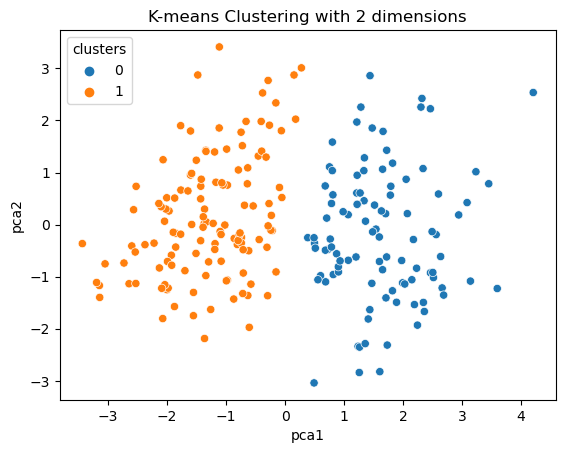

In [59]:
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(train_transformed)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=train_transformed['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [60]:
# Assign cluster labels to the original data
labels = kmeans.labels_
train_transformed['clusters'] = labels

# Analyze centroid values
scaled_centroids = kmeans.cluster_centers_
unscaled_centroids = pipeline1.inverse_transform(scaled_centroids)

k=0
for i, centroid in enumerate(unscaled_centroids):
    print(f"Cluster {i+1} centroid values:")
    for j, value in enumerate(centroid):
        print(f"{df.columns[k]}: {value}")
        k+=1
    print()
    k=0

Cluster 1 centroid values:
age: 58.78
sex: 0.73
cp: 3.6699999999999995
trestbps: 136.25
chol: 256.67
fbs: 0.13999999999999996
restecg: 1.22
thalach: 133.07
exang: 0.6299999999999999
oldpeak: 1.8449999999999998
slope: 2.05

Cluster 2 centroid values:
age: 51.29921259842519
sex: 0.6535433070866141
cp: 2.7559055118110236
trestbps: 129.48031496062993
chol: 238.2755905511811
fbs: 0.14173228346456693
restecg: 0.8188976377952755
thalach: 160.9212598425197
exang: 0.11023622047244083
oldpeak: 0.47480314960629943
slope: 1.2834645669291336



In [61]:
train_transformed

,0,1,2,3,4,5,6,7,8,9,10,clusters
0,-1.411450,0.674632,0.874199,0.195646,1.293941,-0.405096,-1.000020,-1.030682,1.395726,0.612902,0.624963,0
1,-1.523517,0.674632,-0.164771,-0.136197,-0.610545,-0.405096,1.008869,0.843128,-0.716473,0.782778,0.624963,1
2,0.941954,0.674632,-2.242710,0.693409,-0.252276,2.468552,1.008869,0.058743,-0.716473,1.037593,2.274575,0
3,-1.747651,-1.482290,-0.164771,0.306260,-0.497408,-0.405096,-1.000020,0.145897,-0.716473,-0.915986,0.624963,1
4,-1.523517,-1.482290,-1.203740,-0.136197,-0.799108,-0.405096,1.008869,1.017436,-0.716473,0.273149,-1.024649,1
...,...,...,...,...,...,...,...,...,...,...,...,...
222,-1.747651,-1.482290,-0.164771,-2.127250,-0.893390,-0.405096,-1.000020,1.322475,-0.716473,-0.915986,-1.024649,1
223,-0.626982,-1.482290,0.874199,-0.136197,0.426551,-0.405096,-1.000020,0.625243,-0.716473,-0.915986,-1.024649,1
224,1.166088,-1.482290,0.874199,0.969944,-0.403126,-0.405096,1.008869,-1.510029,-0.716473,-0.066604,0.624963,0
225,0.157486,0.674632,0.874199,-0.025583,-1.176234,-0.405096,1.008869,-1.902222,1.395726,0.867717,0.624963,0


# Conclusion

Nasz zbiór danych został podzielony na 5 klastr za pomocą algorytmu KMeans, na temat których możemy powiedzieć następujące rzeczy:

Klaster 1:

-starsi (w porównaniu do reszty grupy) mężczyźni (wiek ok. 60 lat),

-podatni na chorobę nadciśnienia,

-niski poziom cukru.


Klaster 2:

-młodzi mężczyźni,

-wysokie tętno,

-prwdopodobny przerost lewej komory serca,

-niski oldpeak.


Klaster 3:

-mężczyźni,

-podatni na bóle w klatce piersiowej,

-wyjątkowo wysoki oldpeak i slope.


Klaster 4:

-kobiety,

-bardzo wysoki cholesterol,

-brak tendencji do bólu w klatce piersiowej.


Klaster 5:

-grupa mieszana płciowo(kobiety:mężczyźni - 3:7),

-podatni na chorobę nadciśnienia,

-wysoki poziom cukru.